# Imports


In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn: Decision Tree Models
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from imblearn.under_sampling import RandomUnderSampler
from typing import Dict, Any
from tqdm import tqdm
# Scikit-learn: Preprocessing
from sklearn.preprocessing import LabelEncoder

# Scikit-learn: Model Selection
from sklearn.model_selection import train_test_split,RepeatedKFold, cross_val_score

# Scikit-learn: Metrics
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

# 🌟 **Task 1: Enhance DecisionTreeClassifier with Soft Splits** 🌳

## 📌 **Objective**
Modify `scikit-learn`'s `DecisionTreeClassifier` to implement **soft splits** during inference.

---

## 🛠️ **Requirements**
1. **Implement Soft Splits**:
   - 🧮 Each sample has a probability of being routed to the **opposite branch** at each split.
   - 🎲 Introduce randomness to account for uncertainty near decision boundaries.

2. **Add Configurable Parameters**:
   - 🔧 **`alpha`**: Probability of routing to the opposite branch of what the condition indicates.
   - 🔄 **`n_simulations`**: Number of simulations to perform for each sample.

---

## 💡 **Steps to Implement**
1. Subclass `DecisionTreeClassifier`.
2. Override the `predict_proba` method to incorporate:
   - 🔀 Soft split logic based on `alpha`.
   - 📊 Multiple simulations for each sample, averaged for final prediction.
3. Ensure compatibility with any number of target classes.

---

> 📝 **Note**: The training process remains unchanged; modifications apply only to the inference (`predict_proba`).

---

### 🎯 **Deliverables**
- A fully functional, modified `DecisionTreeClassifier` with:
  - Customizable **soft split** behavior.
  - User-defined parameters for **`alpha`** and **`n_simulations`**.


In [2]:
class SoftSplitDecisionTreeClassifier(DecisionTreeClassifier):
    def __init__(self, alpha: float = 0.1, n_simulations: int = 100, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha
        self.n_simulations = n_simulations

    def _soft_split(self, feature_index: int, threshold: float, sample: np.ndarray) -> int:
        prob_go_right = (
            1 - self.alpha if sample[feature_index] > threshold else self.alpha
        )
        return np.random.choice([1, 0], p=[prob_go_right, 1 - prob_go_right])

    def _predict_sample_proba(self, tree, sample: np.ndarray) -> np.ndarray:
        node = 0  # Start at the root node
        while tree.children_left[node] != -1:  # While it's not a leaf node
            feature_index = tree.feature[node]
            threshold = tree.threshold[node]
            child_direction = self._soft_split(feature_index, threshold, sample)
            node = (
                tree.children_left[node]
                if child_direction == 0
                else tree.children_right[node]
            )
        # Normalize leaf node's class counts to get probabilities
        return tree.value[node][0] / tree.value[node][0].sum()

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        X = np.asarray(X)  # Ensure X is a numpy array
        tree = self.tree_
        n_classes = len(self.classes_)
        probabilities = []

        for sample in X:
            sample = np.asarray(sample)  # Ensure sample is a numpy array
            sample_probas = np.zeros(n_classes)
            for _ in range(self.n_simulations):
                sample_probas += self._predict_sample_proba(tree, sample)
            sample_probas /= self.n_simulations
            probabilities.append(sample_probas)

        return np.array(probabilities)


In [3]:
# Datasets for evaluation
import glob
files_clf = glob.glob(r'/Users/adirserruya/Projects/IntoToML/HW1/dataset/classification/*.csv')
files_reg = glob.glob(r'/Users/adirserruya/Projects/IntoToML/HW1/dataset/regression/*.csv')

In [4]:
datasets_dict = {
    'Obesity': {
        'X_train':None,
        'X_test':None,
        'y_train':None,
        'y_test':None,
        'le':None
    },
    'Adult_Income': {
        'X_train':None,
        'X_test':None,
        'y_train':None,
        'y_test':None,
        'le':None
    },
    'Wine_Quality': {
        'X_train':None,
        'X_test':None,
        'y_train':None,
        'y_test':None,
        'le':None
    },
    'Bank': {
        'X_train':None,
        'X_test':None,
        'y_train':None,
        'y_test':None,
        'le':None
    },
    'Student_Success': {
        'X_train':None,
        'X_test':None,
        'y_train':None,
        'y_test':None,
        'le':None
    },
    'Air_Quality': {
        'X_train':None,
        'X_test':None,
        'y_train':None,
        'y_test':None,
        'le':None
    },
    'Apartment_rent': {
        'X_train':None,
        'X_test':None,
        'y_train':None,
        'y_test':None,
        'le':None
    },
    'Bike_Sharing': {
        'X_train':None,
        'X_test':None,
        'y_train':None,
        'y_test':None,
        'le':None
    },
    'Energy':
    {
        'X_train':None,
        'X_test':None,
        'y_train':None,
        'y_test':None,
        'le':None
    },
    'Worker_Productivity':
    {
        'X_train':None,
        'X_test':None,
        'y_train':None,
        'y_test':None,
        'le':None
    }
}

In [9]:
# For each dataset, print Sample count and feature count
for file in files_reg:
    df = pd.read_csv(file,on_bad_lines='skip',encoding_errors= 'ignore')
    if df.shape[1] == 1:
        df = pd.read_csv(file,on_bad_lines='skip',encoding_errors= 'ignore',sep=';')
    print(f'Dataset: {file}')
    print(f'Sample count: {df.shape[0]}')
    print(f'Feature count: {df.shape[1] - 1}')
    print('')
    

Dataset: /Users/adirserruya/Projects/IntoToML/HW1/dataset/regression/garments_worker_productivity.csv
Sample count: 1197
Feature count: 14

Dataset: /Users/adirserruya/Projects/IntoToML/HW1/dataset/regression/AirQualityUCI.csv
Sample count: 9471
Feature count: 16

Dataset: /Users/adirserruya/Projects/IntoToML/HW1/dataset/regression/bike_sharing.csv
Sample count: 17379
Feature count: 16

Dataset: /Users/adirserruya/Projects/IntoToML/HW1/dataset/regression/apartments_for_rent_classified_10K.csv
Sample count: 10000
Feature count: 21

Dataset: /Users/adirserruya/Projects/IntoToML/HW1/dataset/regression/energydata_complete.csv
Sample count: 19735
Feature count: 28



In [10]:

def prepare_data_clf(file_path,target_name,seperator=','):
    df = pd.read_csv(file_path, sep=seperator)
    raw_df = df.copy()
    le = LabelEncoder()
    needs_encoding = df.select_dtypes(include=['object', 'category','int64']).columns.tolist()
    df = df.apply(lambda x: le.fit_transform(x) if x.name in needs_encoding else x)
    # Encoding mapping
    if target_name in needs_encoding:
        le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(le_mapping)
    le_mapping = None
    X = df.drop(columns=[target_name])
    y = df[target_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Undersample the majority class using pandas manipulation
    # rus = RandomUnderSampler(random_state=42)
    # X_train, y_train = rus.fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test, le_mapping,raw_df

def prepare_data_reg(file_path,target_name,seperator=','):

    df = pd.read_csv(file_path, sep=seperator,on_bad_lines='skip',encoding_errors= 'ignore')
    raw_df = df.copy()
    le = LabelEncoder()
    needs_encoding = df.select_dtypes(include=['object', 'category']).columns.tolist()
    df = df.apply(lambda x: le.fit_transform(x) if x.name in needs_encoding else x)
    # Encoding mapping
    if target_name in needs_encoding:
        le_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(le_mapping)
    le_mapping = None
    X = df.drop(columns=[target_name])
    y = df[target_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Undersample the majority class using pandas manipulation
    # rus = RandomUnderSampler(random_state=42)
    # X_train, y_train = rus.fit_resample(X_train, y_train)
    return X_train, X_test, y_train, y_test, le_mapping,raw_df

In [ ]:
files_clf,files_reg

In [ ]:
pd.read_csv(files_reg[3])

In [12]:
datasets_dict['Obesity']['X_train'],datasets_dict['Obesity']['X_test'], datasets_dict['Obesity']['y_train'], datasets_dict['Obesity']['y_test'], datasets_dict['Obesity']['le'],raw_obs = prepare_data_clf(files_clf[0],'NObeyesdad')
datasets_dict['Adult_Income']['X_train'], datasets_dict['Adult_Income']['X_test'], datasets_dict['Adult_Income']['y_train'], datasets_dict['Adult_Income']['y_test'], datasets_dict['Adult_Income']['le'],raw_adult_income = prepare_data_clf(files_clf[1],'income')
datasets_dict['Wine_Quality']['X_train'], datasets_dict['Wine_Quality']['X_test'], datasets_dict['Wine_Quality']['y_train'], datasets_dict['Wine_Quality']['y_test'], datasets_dict['Wine_Quality']['le'],raw_wine = prepare_data_clf(files_clf[2],'quality',seperator=';')
datasets_dict['Bank']['X_train'], datasets_dict['Bank']['X_test'], datasets_dict['Bank']['y_train'], datasets_dict['Bank']['y_test'], datasets_dict['Bank']['le'],raw_bank = prepare_data_clf(files_clf[3],'y',seperator=';')
datasets_dict['Student_Success']['X_train'], datasets_dict['Student_Success']['X_test'], datasets_dict['Student_Success']['y_train'], datasets_dict['Student_Success']['y_test'], datasets_dict['Student_Success']['le'],raw_student = prepare_data_clf(files_clf[4],'Target',seperator=';')

datasets_dict['Air_Quality']['X_train'], datasets_dict['Air_Quality']['X_test'], datasets_dict['Air_Quality']['y_train'], datasets_dict['Air_Quality']['y_test'], datasets_dict['Air_Quality']['le'],raw_air = prepare_data_reg(files_reg[1],'NMHC(GT)',seperator=';')
datasets_dict['Apartment_rent']['X_train'], datasets_dict['Apartment_rent']['X_test'], datasets_dict['Apartment_rent']['y_train'], datasets_dict['Apartment_rent']['y_test'], datasets_dict['Apartment_rent']['le'],raw_apartment = prepare_data_reg(files_reg[3],'price',seperator=';')
datasets_dict['Bike_Sharing']['X_train'], datasets_dict['Bike_Sharing']['X_test'], datasets_dict['Bike_Sharing']['y_train'], datasets_dict['Bike_Sharing']['y_test'], datasets_dict['Bike_Sharing']['le'],raw_bike = prepare_data_reg(files_reg[2],'cnt')
datasets_dict['Energy']['X_train'], datasets_dict['Energy']['X_test'], datasets_dict['Energy']['y_train'], datasets_dict['Energy']['y_test'], datasets_dict['Energy']['le'],raw_energy = prepare_data_reg(files_reg[4],'rv2')
datasets_dict['Worker_Productivity']['X_train'], datasets_dict['Worker_Productivity']['X_test'], datasets_dict['Worker_Productivity']['y_train'], datasets_dict['Worker_Productivity']['y_test'], datasets_dict['Worker_Productivity']['le'],raw_worker = prepare_data_reg(files_reg[0],'actual_productivity')

{'Insufficient_Weight': np.int64(0), 'Normal_Weight': np.int64(1), 'Obesity_Type_I': np.int64(2), 'Obesity_Type_II': np.int64(3), 'Obesity_Type_III': np.int64(4), 'Overweight_Level_I': np.int64(5), 'Overweight_Level_II': np.int64(6)}
{' <=50K': np.int64(0), ' <=50K.': np.int64(1), ' >50K': np.int64(2), ' >50K.': np.int64(3)}
{np.int64(3): np.int64(0), np.int64(4): np.int64(1), np.int64(5): np.int64(2), np.int64(6): np.int64(3), np.int64(7): np.int64(4), np.int64(8): np.int64(5)}
{'no': np.int64(0), 'yes': np.int64(1)}
{'Dropout': np.int64(0), 'Enrolled': np.int64(1), 'Graduate': np.int64(2)}


In [13]:
display(raw_obs.shape,raw_adult_income.shape,raw_wine.shape,raw_bank.shape,raw_student.shape)
# display(raw_obs.columns.tolist(),raw_adult_income.columns.tolist(),
#         raw_wine.columns.tolist(),raw_bank.columns.tolist(),
#         raw_student.columns.tolist())

display(raw_air.shape,raw_apartment.shape,raw_bike.shape,raw_energy.shape,raw_worker.shape)
# display(raw_air.columns.tolist(),raw_apartment.columns.tolist(),
#         raw_bike.columns.tolist(),raw_energy.columns.tolist(),
#         raw_worker.columns.tolist())

(2111, 17)

(48841, 15)

(1599, 12)

(45211, 17)

(4424, 37)

(9471, 17)

(10000, 22)

(17379, 17)

(19735, 29)

(1197, 15)

# Exploratory Data Analysis

## Obsesity

In [40]:
display(raw_obs.describe()[1:].style.format("{:.2f}").background_gradient(cmap='viridis',axis=1))
# Describe of categorical columns
raw_obs.describe(include='object')[1:]

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


/var/folders/b5/wwf8gkc96dqcxmth13t0vhj80000gn/T/ipykernel_18631/2302710251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=raw_obs, palette='viridis')


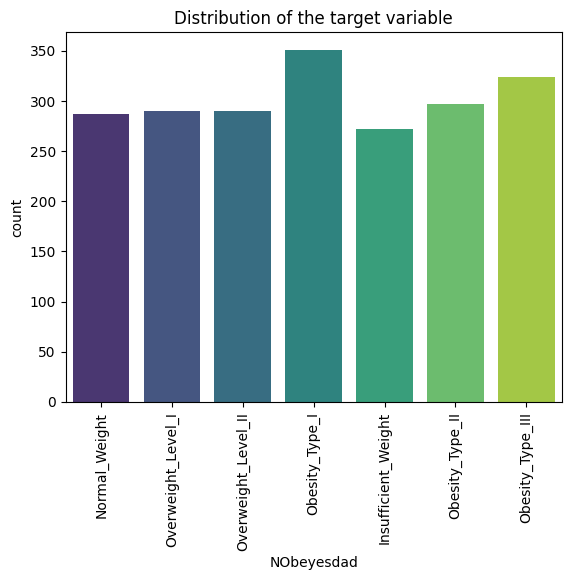

In [15]:
# Plotting the distribution of the target variable
sns.countplot(x='NObeyesdad', data=raw_obs, palette='viridis')
plt.title('Distribution of the target variable')
plt.xticks(rotation=90)
plt.show()


In [17]:
raw_obs

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [41]:
from scipy.stats import chi2_contingency

def analyze_categorical_relationship(df: pd.DataFrame, col1: str, col2: str) -> None:
    """
    Analyze the relationship between two categorical columns.
    
    Args:
        df (pd.DataFrame): The input dataframe.
        col1 (str): First categorical column.
        col2 (str): Second categorical column.
    """
    # Contingency Table
    contingency_table = pd.crosstab(df[col1], df[col2])
    print("Contingency Table:")
    display(contingency_table)
    
    # Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("\nChi-Square Test Results:")
    print(f"Chi-Square Statistic: {chi2:.7f}")
    print(f"p-value: {p:.7f}")
    print(f"Degrees of Freedom: {dof}")
    
    if p < 0.05:
        print("Result: Significant association between the variables.")
    else:
        print("Result: No significant association between the variables.")

analyze_categorical_relationship(raw_obs, 'NObeyesdad', 'family_history_with_overweight')
analyze_categorical_relationship(raw_obs, 'NObeyesdad', 'FAVC')
analyze_categorical_relationship(raw_obs, 'NObeyesdad', 'SMOKE')
analyze_categorical_relationship(raw_obs, 'NObeyesdad', 'SCC')


Contingency Table:


family_history_with_overweight,no,yes
NObeyesdad,,
Insufficient_Weight,146,126
Normal_Weight,132,155
Obesity_Type_I,7,344
Obesity_Type_II,1,296
Obesity_Type_III,0,324
Overweight_Level_I,81,209
Overweight_Level_II,18,272



Chi-Square Test Results:
Chi-Square Statistic: 621.9794354
p-value: 0.0000000
Degrees of Freedom: 6
Result: Significant association between the variables.
Contingency Table:


FAVC,no,yes
NObeyesdad,,
Insufficient_Weight,51,221
Normal_Weight,79,208
Obesity_Type_I,11,340
Obesity_Type_II,7,290
Obesity_Type_III,1,323
Overweight_Level_I,22,268
Overweight_Level_II,74,216



Chi-Square Test Results:
Chi-Square Statistic: 233.3413036
p-value: 0.0000000
Degrees of Freedom: 6
Result: Significant association between the variables.
Contingency Table:


SMOKE,no,yes
NObeyesdad,,
Insufficient_Weight,271,1
Normal_Weight,274,13
Obesity_Type_I,345,6
Obesity_Type_II,282,15
Obesity_Type_III,323,1
Overweight_Level_I,287,3
Overweight_Level_II,285,5



Chi-Square Test Results:
Chi-Square Statistic: 32.1378321
p-value: 0.0000154
Degrees of Freedom: 6
Result: Significant association between the variables.
Contingency Table:


SCC,no,yes
NObeyesdad,,
Insufficient_Weight,250,22
Normal_Weight,257,30
Obesity_Type_I,349,2
Obesity_Type_II,296,1
Obesity_Type_III,324,0
Overweight_Level_I,253,37
Overweight_Level_II,286,4



Chi-Square Test Results:
Chi-Square Statistic: 123.0238987
p-value: 0.0000000
Degrees of Freedom: 6
Result: Significant association between the variables.


/var/folders/b5/wwf8gkc96dqcxmth13t0vhj80000gn/T/ipykernel_18631/3325082920.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=cont_col, palette="husl")


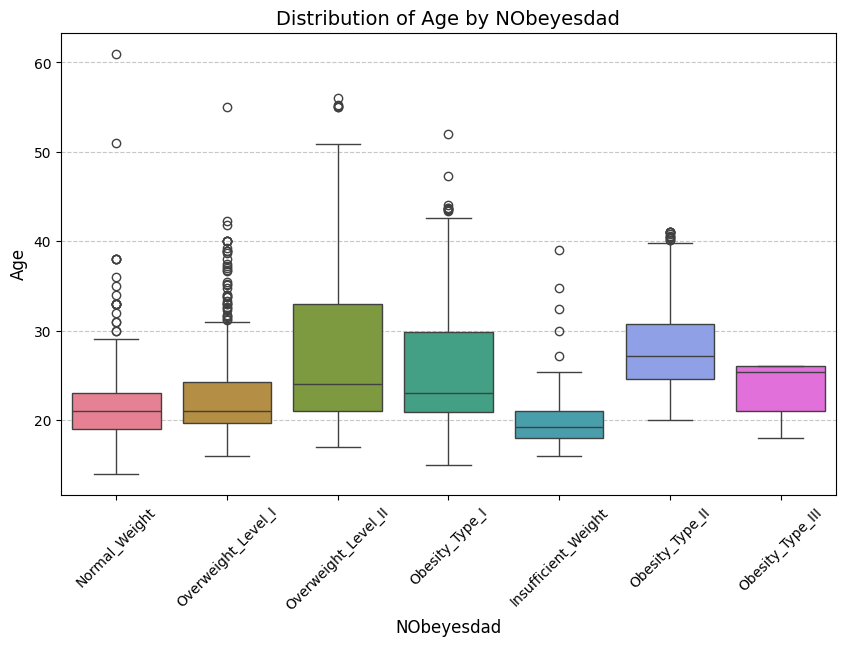

/var/folders/b5/wwf8gkc96dqcxmth13t0vhj80000gn/T/ipykernel_18631/3325082920.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=cont_col, palette="husl", inner="quartile",fill=False,split=True)


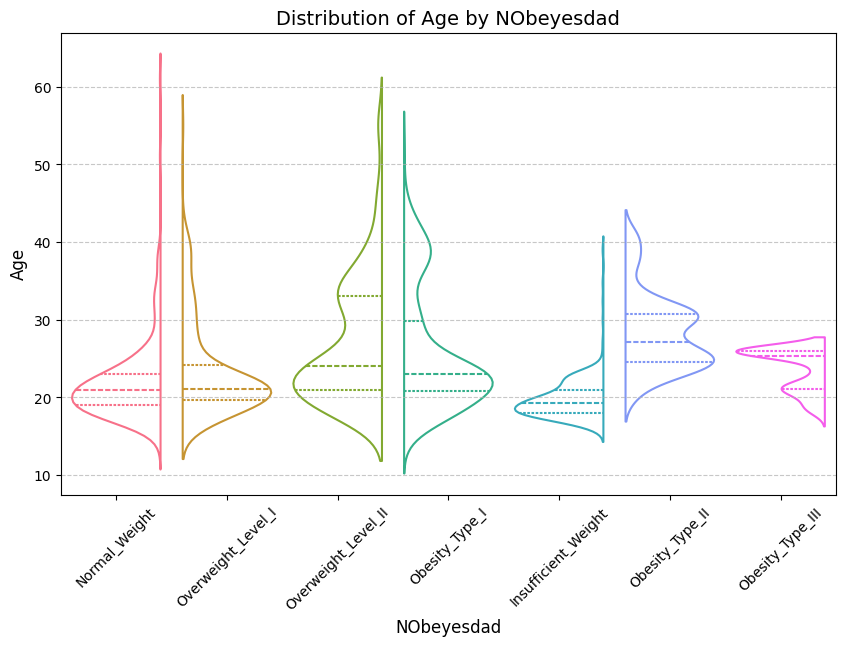

/var/folders/b5/wwf8gkc96dqcxmth13t0vhj80000gn/T/ipykernel_18631/3325082920.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=cat_col, y=cont_col, palette="husl")


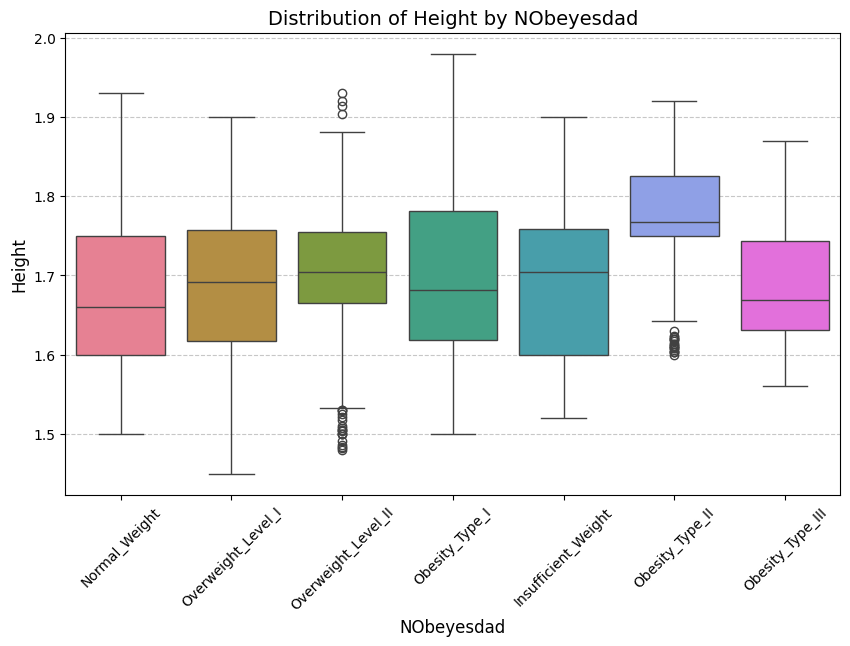

/var/folders/b5/wwf8gkc96dqcxmth13t0vhj80000gn/T/ipykernel_18631/3325082920.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x=cat_col, y=cont_col, palette="husl", inner="quartile",fill=False,split=True)


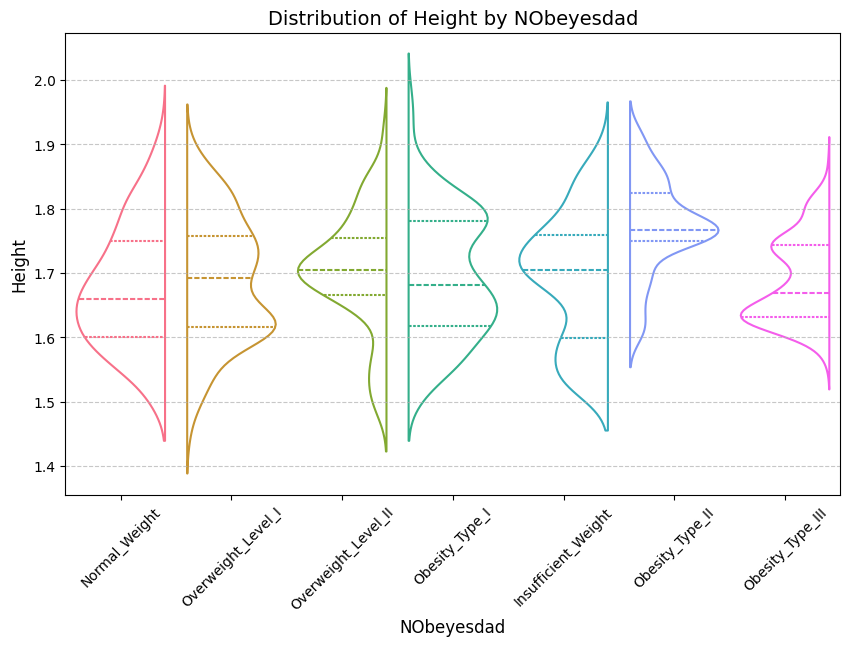

In [48]:
def plot_boxplot(df: pd.DataFrame, cat_col: str, cont_col: str) -> None:
    """
    Plot a boxplot for a continuous variable grouped by a categorical variable.
    
    Args:
        df (pd.DataFrame): The input dataframe.
        cat_col (str): Categorical column.
        cont_col (str): Continuous column.
    """
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=cat_col, y=cont_col, palette="husl")
    plt.title(f"Distribution of {cont_col} by {cat_col}", fontsize=14)
    plt.xlabel(cat_col, fontsize=12)
    plt.ylabel(cont_col, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
def plot_violinplot(df: pd.DataFrame, cat_col: str, cont_col: str) -> None:
    """
    Plot a violin plot for a continuous variable grouped by a categorical variable.
    
    Args:
        df (pd.DataFrame): The input dataframe.
        cat_col (str): Categorical column.
        cont_col (str): Continuous column.
    """
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df, x=cat_col, y=cont_col, palette="husl", inner="quartile",fill=False,split=True)
    plt.title(f"Distribution of {cont_col} by {cat_col}", fontsize=14)
    plt.xlabel(cat_col, fontsize=12)
    plt.ylabel(cont_col, fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
plot_boxplot(raw_obs, 'NObeyesdad', 'Age')
plot_violinplot(raw_obs, 'NObeyesdad', 'Age')
plot_boxplot(raw_obs, 'NObeyesdad', 'Height')
plot_violinplot(raw_obs, 'NObeyesdad', 'Height')


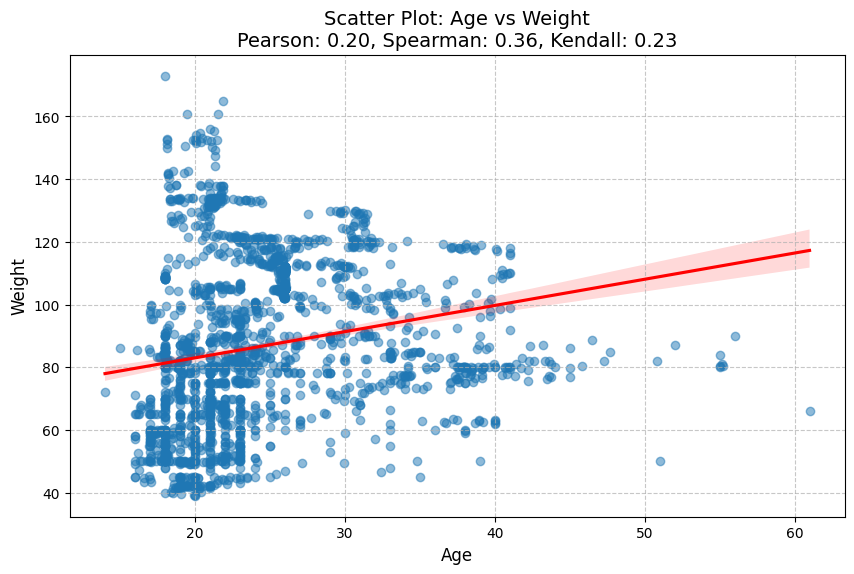

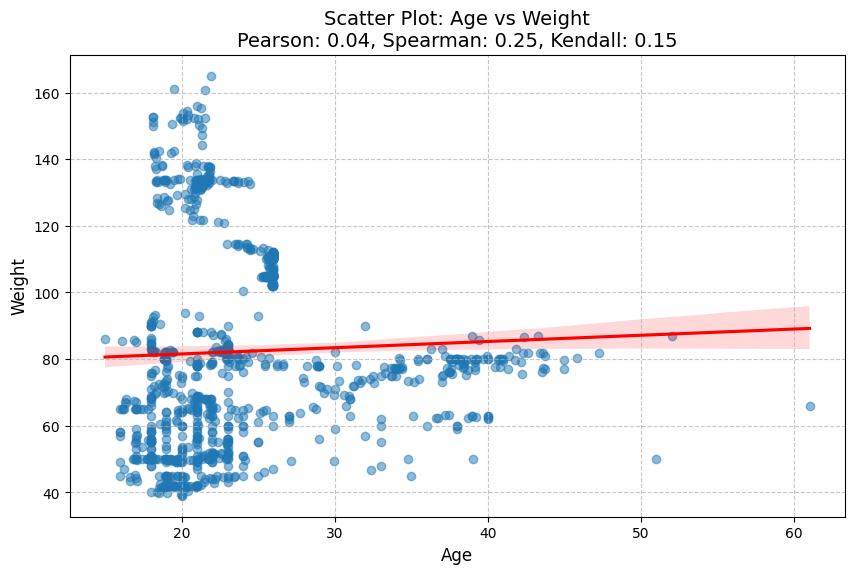

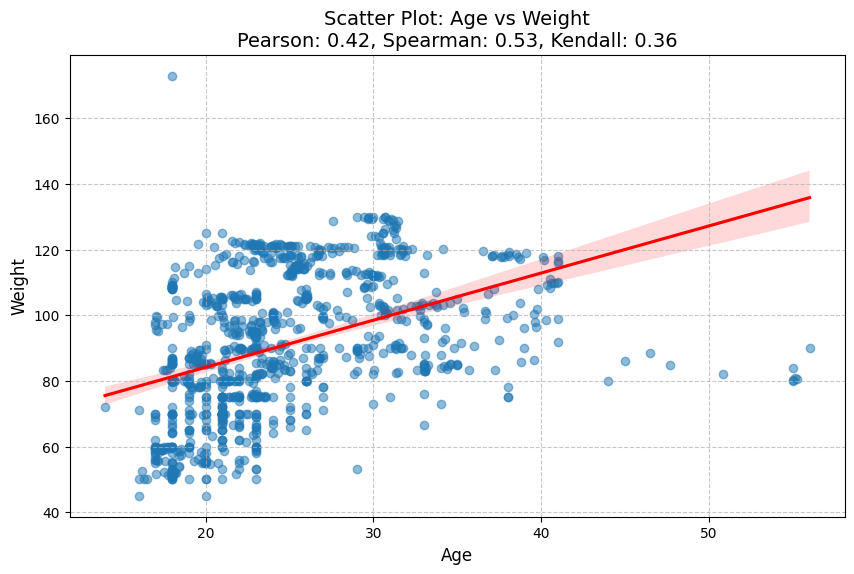

In [70]:
from scipy.stats import pearsonr, spearmanr, kendalltau
import numpy as np

def plot_scatter_with_correlation(df: pd.DataFrame, col1: str, col2: str) -> None:
    """
    Plot a scatter plot between two columns with correlations and regression line.
    
    Args:
        df (pd.DataFrame): The input dataframe.
        col1 (str): First column (x-axis).
        col2 (str): Second column (y-axis).
    """
    x = df[col1]
    y = df[col2]
    
    # Calculate Correlations
    pearson_corr, _ = pearsonr(x, y)
    spearman_corr, _ = spearmanr(x, y)
    kendall_corr, _ = kendalltau(x, y)
    
    # Plot Scatter
    plt.figure(figsize=(10, 6))
    sns.regplot(x=col1, y=col2, data=df, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
    plt.title(
        f"Scatter Plot: {col1} vs {col2}\n"
        f"Pearson: {pearson_corr:.2f}, Spearman: {spearman_corr:.2f}, Kendall: {kendall_corr:.2f}",
        fontsize=14
    )
    plt.xlabel(col1, fontsize=12)
    plt.ylabel(col2, fontsize=12)
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()


plot_scatter_with_correlation(raw_obs, 'Age', 'Weight')
plot_scatter_with_correlation(raw_obs[raw_obs['Gender'] == 'Female'], 'Age', 'Weight')
plot_scatter_with_correlation(raw_obs[raw_obs['Gender'] == 'Male'], 'Age', 'Weight')
# # Now for smokers and non-smokers
# plot_scatter_with_correlation(raw_obs[raw_obs['SMOKE'] == 'yes'], 'Age', 'Weight')
# plot_scatter_with_correlation(raw_obs[raw_obs['SMOKE'] == 'no'], 'Age', 'Weight')



In [368]:
from sklearn.model_selection import RepeatedStratifiedKFold
def cross_validate_models(X: np.ndarray, y: np.ndarray,
                          alpha_values, n_simulations_values,
                          random_state=42,
                          improved_model=False):
    results = []
    sensitivity_results = []

    # Initialize Repeated K-Fold Cross-Validation
    rkf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=random_state)

    for alpha in tqdm(alpha_values, desc="Alpha Values"):
        for n_simulations in tqdm(n_simulations_values, desc="n_simulation Values"):
            soft_accuracies, soft_aucs = [], []
            regular_accuracies, regular_aucs = [], []

            # Perform repeated K-Fold cross-validation
            for train_index, test_index in rkf.split(X, y):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                # Train SoftSplitDecisionTreeClassifier
                if improved_model:
                    soft_model = ImprovedSoftSplitDecisionTreeClassifier(
                        alpha=alpha, n_simulations=n_simulations, random_state=random_state
                    )
                else:
                    soft_model = SoftSplitDecisionTreeClassifier(
                        alpha=alpha, n_simulations=n_simulations, random_state=random_state
                    )
                soft_model.fit(X_train, y_train)
                probas_soft = soft_model.predict_proba(X_test)
                y_pred_soft = np.argmax(probas_soft, axis=1)

                # Train Regular DecisionTreeClassifier
                regular_model = DecisionTreeClassifier(random_state=random_state)
                regular_model.fit(X_train, y_train)
                probas_regular = regular_model.predict_proba(X_test)
                y_pred_regular = regular_model.predict(X_test)

                # Compute metrics
                soft_accuracies.append(accuracy_score(y_test, y_pred_soft))
                regular_accuracies.append(accuracy_score(y_test, y_pred_regular))

                if len(np.unique(y_test)) > 1:
                    if len(np.unique(y_test)) == 2:
                        # Extract probabilities for the positive class (index 1)
                        auc_score_soft = roc_auc_score(y_test, probas_soft[:, 1])
                        auc_score_regular = roc_auc_score(y_test, probas_regular[:, 1])
                        
                        soft_aucs.append(auc_score_soft)
                        regular_aucs.append(auc_score_regular)
                    else:
                        soft_aucs.append(roc_auc_score(y_test, probas_soft, multi_class="ovr"))
                        regular_aucs.append(roc_auc_score(y_test, probas_regular, multi_class="ovr"))
                else:
                    print(f"Skipping AUC calculation for this fold as y_test contains only one class: {np.unique(y_test)}")
                    # Insert 

            # Store results
            results.append({
                "Alpha": alpha,
                "n_simulations": n_simulations,
                "Model": "Soft Split Decision Tree",
                "Mean Accuracy": np.mean(soft_accuracies),
                "Mean AUC": np.mean(soft_aucs) if soft_aucs else None
            })
            results.append({
                "Alpha": alpha,
                "n_simulations": n_simulations,
                "Model": "Regular Decision Tree",
                "Mean Accuracy": np.mean(regular_accuracies),
                "Mean AUC": np.mean(regular_aucs) if regular_aucs else None
            })

            # Sensitivity analysis data
            sensitivity_results.append({
                "Alpha": alpha,
                "n_simulations": n_simulations,
                "Soft Accuracy": np.mean(soft_accuracies),
                "Regular Accuracy": np.mean(regular_accuracies),
                "Soft AUC": np.mean(soft_aucs) if soft_aucs else None,
                "Regular AUC": np.mean(regular_aucs) if regular_aucs else None,
            })

    results_df = pd.DataFrame(results)
    sensitivity_df = pd.DataFrame(sensitivity_results)

    return {
        "results": results_df,
        "sensitivity_analysis": sensitivity_df,
    }



In [ ]:
# # save resuults using joblib
# import joblib
# results_obesity = cross_validate_models(
#     datasets_dict['Obesity']['X_train'].values,
#     datasets_dict['Obesity']['y_train'].values,
#     alpha_values=[0.1, 0.2, 0.3,0.4],
#     n_simulations_values=[10, 50, 100],
#     random_state=42
# )
# joblib.dump(results_obesity, 'results_obesity.pkl')

# results_adult_income = cross_validate_models(
#     datasets_dict['Adult_Income']['X_train'].values,
#     datasets_dict['Adult_Income']['y_train'].values,
#     alpha_values=[0.1, 0.2, 0.3,0.4],
#     n_simulations_values=[10, 50, 100],
#     random_state=23
# )
# joblib.dump(results_adult_income, 'results_adult_income.pkl')

# results_wine_quality = cross_validate_models(
#     datasets_dict['Wine_Quality']['X_train'].values,
#     datasets_dict['Wine_Quality']['y_train'].values,
#     alpha_values=[0.1, 0.2, 0.3,0.4],
#     n_simulations_values=[10, 50, 100],
#     random_state=4272
# )
# joblib.dump(results_wine_quality, 'results_wine_quality.pkl')

# results_bank = cross_validate_models(
#     datasets_dict['Bank']['X_train'].values,
#     datasets_dict['Bank']['y_train'].values,
#     alpha_values=[0.1, 0.2, 0.3,0.4],
#     n_simulations_values=[10, 50, 100],
#     random_state=42
# )
# joblib.dump(results_bank, 'results_bank.pkl')
# results_student_success = cross_validate_models(
#     datasets_dict['Student_Success']['X_train'].values,
#     datasets_dict['Student_Success']['y_train'].values,
#     alpha_values=[0.1, 0.2, 0.3,0.4],
#     n_simulations_values=[10, 50, 100],
#     random_state=555
# )
# joblib.dump(results_student_success, 'results_student_success.pkl')

In [49]:
import joblib
def load_results(file_path):
    results = joblib.load(file_path)
    results_df = pd.DataFrame(results['results'])
    return results_df


In [63]:
from IPython.display import display, HTML

path = 'results_wine_quality.pkl'
results_df = load_results(path)
results_df[results_df['Model'] == 'Soft Split Decision Tree']
# Copy pastable to docx table, and design it


display(HTML(f'<h1 style="color:#219ebc;">{path.split(".")[0].replace("results_","")} Dataset</h1>'))
display(results_df[results_df['Model'] == 'Soft Split Decision Tree'].sort_values(by = ['Mean Accuracy','Mean AUC'],ascending=False).style.format({
    "Mean Accuracy": "{:.2f}",
    "Mean AUC": "{:.2f}"
}).background_gradient(cmap='viridis',axis=1))

,Alpha,n_simulations,Model,Mean Accuracy,Mean AUC
2,0.100000,50,Soft Split Decision Tree,0.59,0.71
4,0.100000,100,Soft Split Decision Tree,0.59,0.72
0,0.100000,10,Soft Split Decision Tree,0.55,0.67
10,0.200000,100,Soft Split Decision Tree,0.54,0.73
8,0.200000,50,Soft Split Decision Tree,0.53,0.68
6,0.200000,10,Soft Split Decision Tree,0.49,0.61
16,0.300000,100,Soft Split Decision Tree,0.48,0.67
14,0.300000,50,Soft Split Decision Tree,0.46,0.65
20,0.400000,50,Soft Split Decision Tree,0.44,0.58
12,0.300000,10,Soft Split Decision Tree,0.44,0.57


In [ ]:

results_df[results_df['Model'] == 'Soft Split Decision Tree'].sort_values(by='Mean Accuracy', ascending=False)
# Plot correlation between alpha, n_simulations and accuracy
sns.heatmap(
    results_adult_income['sensitivity_analysis'].pivot(
        index="Alpha", columns="n_simulations", values="Soft Accuracy"
    ),
    annot=True,
    cmap="viridis",
)
plt.title("Soft Split Decision Tree Accuracy")
plt.show()




In [ ]:
results_df

In [ ]:
sns.heatmap(
    results_df[results_df['Model'] == 'Soft Split Decision Tree'].drop(columns=['Model']).corr(),
    annot=True,
    cmap="viridis",
    fmt=".2f",
)

Analyzing Obesity Dataset


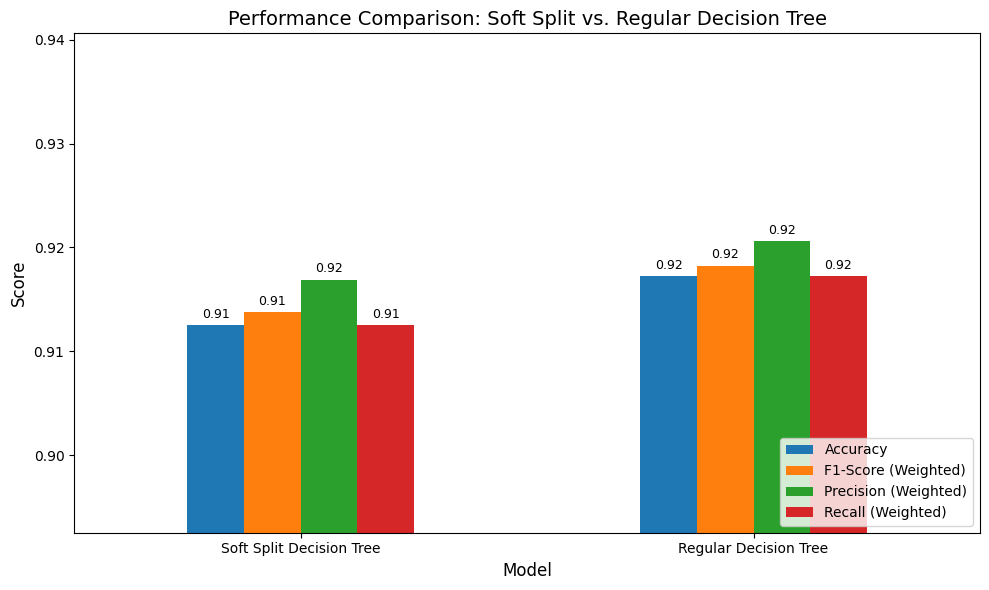

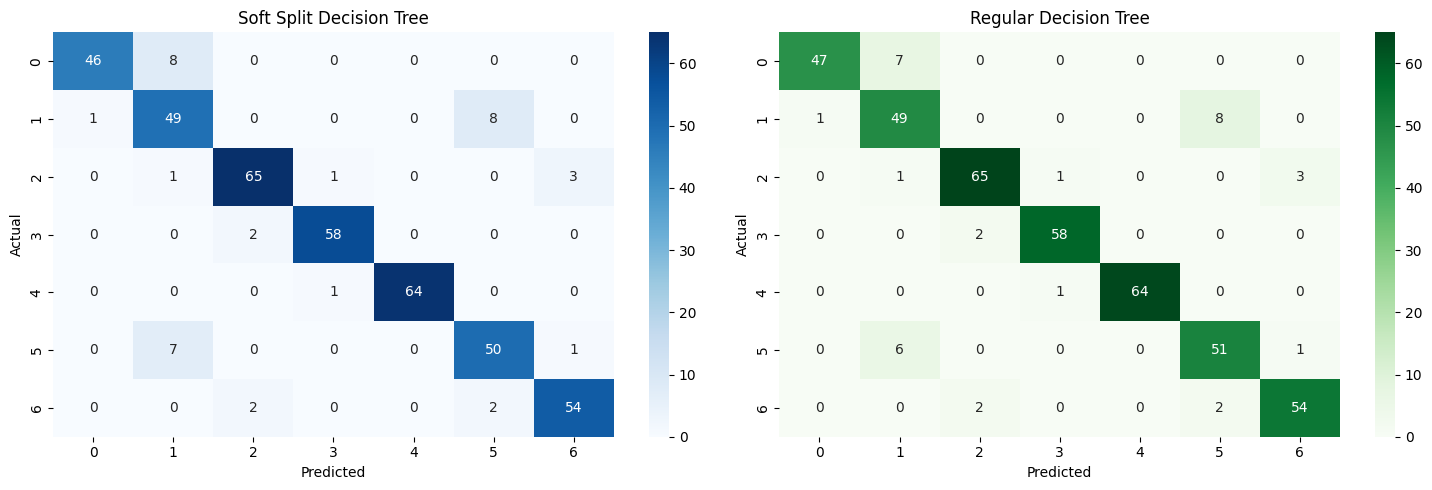

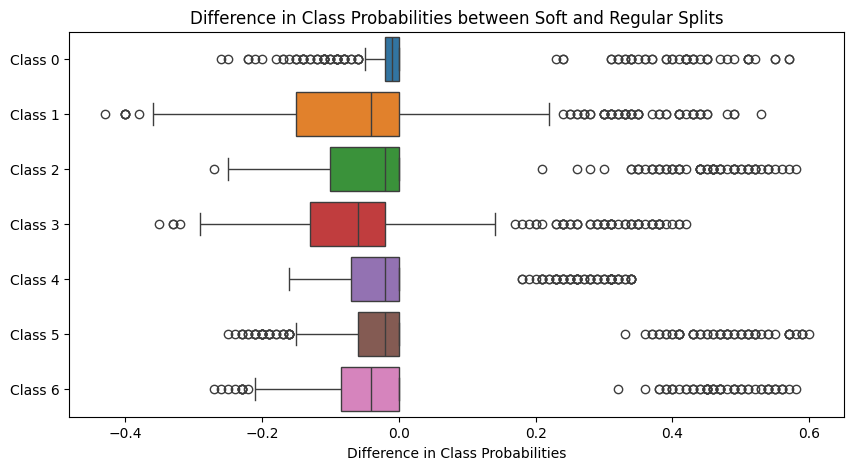

In [69]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test, alpha=0.1, n_simulations=100, random_state=42):
    # Train SoftSplitDecisionTreeClassifier
    soft_model = SoftSplitDecisionTreeClassifier(alpha=alpha, n_simulations=n_simulations, random_state=random_state)
    soft_model.fit(X_train, y_train)
    y_pred_soft = np.argmax(soft_model.predict_proba(X_test), axis=1)
    probas_soft = soft_model.predict_proba(X_test)

    # Train Regular DecisionTreeClassifier
    regular_model = DecisionTreeClassifier(random_state=random_state)
    regular_model.fit(X_train, y_train)
    y_pred_regular = regular_model.predict(X_test)
    probas_regular = regular_model.predict_proba(X_test)

    # Calculate Metrics
    metrics = {
        "Model": ["Soft Split Decision Tree", "Regular Decision Tree"],
        "Accuracy": [
            accuracy_score(y_test, y_pred_soft),
            accuracy_score(y_test, y_pred_regular),
        ],
        "F1-Score (Weighted)": [
            f1_score(y_test, y_pred_soft, average="weighted"),
            f1_score(y_test, y_pred_regular, average="weighted"),
        ],
        "Precision (Weighted)": [
            precision_score(y_test, y_pred_soft, average="weighted"),
            precision_score(y_test, y_pred_regular, average="weighted"),
        ],
        "Recall (Weighted)": [
            recall_score(y_test, y_pred_soft, average="weighted"),
            recall_score(y_test, y_pred_regular, average="weighted"),
        ],
    }

    # Confusion Matrices
    conf_matrix_soft = confusion_matrix(y_test, y_pred_soft)
    conf_matrix_regular = confusion_matrix(y_test, y_pred_regular)

    # Probability Differences
    probas_diff = pd.DataFrame(probas_regular - probas_soft, columns=[f"Class {i}" for i in range(probas_regular.shape[1])])

    return {
        "metrics": metrics,
        "conf_matrix_soft": conf_matrix_soft,
        "conf_matrix_regular": conf_matrix_regular,
        "probas_diff": probas_diff,
    }


def plot_metrics(metrics):
    """
    Plot metrics as a bar chart and add value labels.
    
    Args:
        metrics (list of dicts): List containing dictionaries with model metrics.
    """
    # Convert metrics to DataFrame
    metrics_df = pd.DataFrame(metrics)
    min_y_lim = metrics_df.drop(columns="Model").min().min() - 0.02
    max_y_lim = min(metrics_df.drop(columns="Model").max().max() + 0.02, 1)

    # Plotting
    ax = metrics_df.set_index("Model").plot(kind="bar", figsize=(10, 6), rot=0, ylim=(min_y_lim, max_y_lim))
    
    # Adding value labels above the bars
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=9, padding=3)
    
    # Titles and labels
    plt.title("Performance Comparison: Soft Split vs. Regular Decision Tree", fontsize=14)
    plt.ylabel("Score", fontsize=12)
    plt.xlabel("Model", fontsize=12)

    # Dynamic y-axis limits
    plt.ylim(min_y_lim, max_y_lim)

    # Legend
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()


def plot_confusion_matrices(conf_matrix_soft, conf_matrix_regular):
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.heatmap(conf_matrix_soft, annot=True, fmt="d", cmap="Blues", ax=ax[0])
    ax[0].set_title("Soft Split Decision Tree")
    ax[0].set_xlabel("Predicted")
    ax[0].set_ylabel("Actual")

    sns.heatmap(conf_matrix_regular, annot=True, fmt="d", cmap="Greens", ax=ax[1])
    ax[1].set_title("Regular Decision Tree")
    ax[1].set_xlabel("Predicted")
    ax[1].set_ylabel("Actual")
    plt.tight_layout()
    plt.show()


def plot_probability_differences(probas_diff):
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=probas_diff, orient="h")
    plt.xlabel("Difference in Class Probabilities")
    plt.title("Difference in Class Probabilities between Soft and Regular Splits")
    plt.show()


def analyze_dataset(X_train, X_test, y_train, y_test, alpha=0.1, n_simulations=100, random_state=42):
    results = train_and_evaluate_models(X_train, X_test, y_train, y_test, alpha, n_simulations, random_state)

    # Plot metrics comparison
    plot_metrics(results["metrics"])

    # Plot confusion matrices
    plot_confusion_matrices(results["conf_matrix_soft"], results["conf_matrix_regular"])

    # Plot probability differences
    plot_probability_differences(results["probas_diff"])

    return results

for dataset_name, dataset in datasets_dict.items():
    print(f"Analyzing {dataset_name} Dataset")
    analyze_dataset(
        dataset["X_train"],
        dataset["X_test"],
        dataset["y_train"],
        dataset["y_test"],
        alpha=0.1,
        n_simulations=100,
        random_state=42,
    )
    print("\n\n")
    break

## Programming Task 2 (20 points)
### Adjust the idea presented in Task 1 for regression. Repeat all steps mentioned above
### with the appropriate evaluation metrics (e.g. MSE). 

In [71]:
class SoftSplitDecisionTreeRegressor(DecisionTreeRegressor):
    def __init__(self, alpha: float = 0.1, n_simulations: int = 100, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha
        self.n_simulations = n_simulations

    def _soft_split(self, feature_index: int, threshold: float, sample: np.ndarray) -> int:
        prob_go_right = (
            1 - self.alpha if sample[feature_index] > threshold else self.alpha
        )
        return np.random.choice([1, 0], p=[prob_go_right, 1 - prob_go_right])

    def _predict_sample(self, tree, sample: np.ndarray) -> float:
        node = 0  # Start at the root node
        while tree.children_left[node] != -1:  # While it's not a leaf node
            feature_index = tree.feature[node]
            threshold = tree.threshold[node]
            child_direction = self._soft_split(feature_index, threshold, sample)
            node = (
                tree.children_left[node]
                if child_direction == 0
                else tree.children_right[node]
            )
        # Return the predicted value for the leaf node
        return tree.value[node][0, 0]

    def predict(self, X: np.ndarray) -> np.ndarray:
        X = np.asarray(X)  # Ensure X is a numpy array
        tree = self.tree_
        predictions = []
        # upper_bounds = []
        # lower_bounds = []
        for sample in X:
            sample = np.asarray(sample)  # Ensure sample is a numpy array
            sample_predictions = []
            for _ in range(self.n_simulations):
                sample_predictions.append(self._predict_sample(tree, sample))
            predictions.append(np.mean(sample_predictions))  # Average predictions
            # Added below intervals as well for me to check.
            # upper_bounds.append(np.percentile(sample_predictions, 97.5))
            # lower_bounds.append(np.percentile(sample_predictions, 2.5))

        return np.array(predictions)#, np.array(upper_bounds), np.array(lower_bounds)



In [72]:

# import mean_squared_error, mean_absolute_error, max_error, r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, r2_score

def cross_validate_models_regression(X: np.ndarray, y: np.ndarray, alpha_values, n_simulations_values, random_state=42):
    results = []
    sensitivity_results = []

    # Initialize Repeated K-Fold Cross-Validation
    rkf = RepeatedKFold(n_splits=5, n_repeats=2, random_state=random_state)

    for alpha in tqdm(alpha_values, desc="Alpha Values"):
        for n_simulations in tqdm(n_simulations_values, desc="n_simulation Values"):
            soft_mse, soft_rmse, soft_mae, soft_max_error, soft_r2 = [], [], [], [], []
            regular_mse, regular_rmse, regular_mae, regular_max_error, regular_r2 = [], [], [], [], []

            # Perform repeated K-Fold cross-validation
            for train_index, test_index in rkf.split(X, y):
                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]
                
                # # Print value ranges for debug
                # print(f"Value range for y_train: min={np.min(y_train)}, max={np.max(y_train)}")
                # print(f"Value range for y_test: min={np.min(y_test)}, max={np.max(y_test)}")
                
                # Train SoftSplitDecisionTreeRegressor
                soft_model = SoftSplitDecisionTreeRegressor(
                    alpha=alpha, n_simulations=n_simulations, random_state=random_state
                )
                soft_model.fit(X_train, y_train)
                y_pred_soft = soft_model.predict(X_test)

                # Train Regular DecisionTreeRegressor
                regular_model = DecisionTreeRegressor(random_state=random_state)
                regular_model.fit(X_train, y_train)
                y_pred_regular = regular_model.predict(X_test)

                # Compute metrics for SoftSplitDecisionTreeRegressor
                soft_mse.append(mean_squared_error(y_test, y_pred_soft))
                soft_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_soft)))
                soft_mae.append(mean_absolute_error(y_test, y_pred_soft))
                soft_max_error.append(max_error(y_test, y_pred_soft))
                soft_r2.append(r2_score(y_test, y_pred_soft))

                # Compute metrics for Regular DecisionTreeRegressor
                regular_mse.append(mean_squared_error(y_test, y_pred_regular))
                regular_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred_regular)))
                regular_mae.append(mean_absolute_error(y_test, y_pred_regular))
                regular_max_error.append(max_error(y_test, y_pred_regular))
                regular_r2.append(r2_score(y_test, y_pred_regular))

            # Store results
            results.append({
                "Alpha": alpha,
                "n_simulations": n_simulations,
                "Model": "Soft Split Decision Tree",
                "Mean MSE": np.mean(soft_mse),
                "Mean RMSE": np.mean(soft_rmse),
                "Mean MAE": np.mean(soft_mae),
                "Mean Max Error": np.mean(soft_max_error),
                "Mean R2": np.mean(soft_r2)
            })
            results.append({
                "Alpha": alpha,
                "n_simulations": n_simulations,
                "Model": "Regular Decision Tree",
                "Mean MSE": np.mean(regular_mse),
                "Mean RMSE": np.mean(regular_rmse),
                "Mean MAE": np.mean(regular_mae),
                "Mean Max Error": np.mean(regular_max_error),
                "Mean R2": np.mean(regular_r2)
            })

            # Sensitivity analysis data
            sensitivity_results.append({
                "Alpha": alpha,
                "n_simulations": n_simulations,
                "Soft MSE": np.mean(soft_mse),
                "Soft RMSE": np.mean(soft_rmse),
                "Soft MAE": np.mean(soft_mae),
                "Soft Max Error": np.mean(soft_max_error),
                "Soft R2": np.mean(soft_r2),
                "Regular MSE": np.mean(regular_mse),
                "Regular RMSE": np.mean(regular_rmse),
                "Regular MAE": np.mean(regular_mae),
                "Regular Max Error": np.mean(regular_max_error),
                "Regular R2": np.mean(regular_r2)
            })

    results_df = pd.DataFrame(results)
    sensitivity_df = pd.DataFrame(sensitivity_results)

    return {
        "results": results_df,
        "sensitivity_analysis": sensitivity_df,
    }


In [73]:
datasets_dict['Air_Quality']['X_train'].isna().sum()
# Drop cols that all values are NaN
datasets_dict['Air_Quality']['X_train'] = datasets_dict['Air_Quality']['X_train'].dropna(axis=1,how='all')
datasets_dict['Air_Quality']['X_test'] = datasets_dict['Air_Quality']['X_test'].dropna(axis=1,how='all')
# Drop na rows
datasets_dict['Air_Quality']['X_train'] = datasets_dict['Air_Quality']['X_train'].dropna()
datasets_dict['Air_Quality']['X_test'] = datasets_dict['Air_Quality']['X_test'].dropna()
datasets_dict['Air_Quality']['y_train'] = datasets_dict['Air_Quality']['y_train'].dropna()
datasets_dict['Air_Quality']['y_test'] = datasets_dict['Air_Quality']['y_test'].dropna()

datasets_dict['Air_Quality']['X_train'].isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [214]:
# # save resuults using joblib
# import joblib
results_air_quality = cross_validate_models_regression(
    datasets_dict['Air_Quality']['X_train'].values,
    datasets_dict['Air_Quality']['y_train'].values,
    alpha_values=[0.1, 0.2, 0.3, 0.4],
    n_simulations_values=[10, 50, 100],
    random_state=42
)
joblib.dump(results_air_quality, 'results_air_quality.pkl')

results_apartment_rent = cross_validate_models_regression(
    datasets_dict['Apartment_rent']['X_train'].values,
    datasets_dict['Apartment_rent']['y_train'].values,
    alpha_values=[0.1, 0.2, 0.3, 0.4],
    n_simulations_values=[10, 50, 100],
    random_state=42
)
joblib.dump(results_apartment_rent, 'results_apartment_rent.pkl')

results_bike_sharing = cross_validate_models_regression(
    datasets_dict['Bike_Sharing']['X_train'].values,
    datasets_dict['Bike_Sharing']['y_train'].values,
    alpha_values=[0.1, 0.2, 0.3, 0.4],
    n_simulations_values=[10, 50, 100],
    random_state=42
)
joblib.dump(results_bike_sharing, 'results_bike_sharing.pkl')

results_energy = cross_validate_models_regression(
    datasets_dict['Energy']['X_train'].values,
    datasets_dict['Energy']['y_train'].values,
    alpha_values=[0.1, 0.2, 0.3, 0.4],
    n_simulations_values=[10, 50, 100],
    random_state=42
)
joblib.dump(results_energy, 'results_energy.pkl')

results_worker_productivity = cross_validate_models_regression(
    datasets_dict['Worker_Productivity']['X_train'].values,
    datasets_dict['Worker_Productivity']['y_train'].values,
    alpha_values=[0.1, 0.2, 0.3, 0.4],
    n_simulations_values=[10, 50, 100],
    random_state=42
)
joblib.dump(results_worker_productivity, 'results_worker_productivity.pkl')


Alpha Values: 100%|██████████| 4/4 [01:16<00:00, 19.24s/it]


['results_worker_productivity.pkl']

In [79]:
from IPython.display import display, HTML

path = 'results_energy.pkl'
res_df = load_results(path)
display(HTML(f'<h1 style="color:#219ebc;">{path.split(".")[0].replace("results_","")} Dataset</h1>'))
res_df[res_df['Model'] == 'Soft Split Decision Tree'].sort_values(by = ['Mean MSE','Mean RMSE'],ascending=True).style.format({
    "Mean MSE": "{:.5f}",
    "Mean RMSE": "{:.5f}",
    "Mean MAE": "{:.5f}",
    "Mean Max Error": "{:.5f}",
    "Mean R2": "{:.5f}"
}).background_gradient(cmap='viridis',axis=1)

,Alpha,n_simulations,Model,Mean MSE,Mean RMSE,Mean MAE,Mean Max Error,Mean R2
4,0.100000,100,Soft Split Decision Tree,5.61343,2.36918,1.91937,7.23963,0.97331
2,0.100000,50,Soft Split Decision Tree,5.94971,2.43910,1.94325,8.68224,0.97171
0,0.100000,10,Soft Split Decision Tree,8.64637,2.94011,2.14403,14.44509,0.95889
10,0.200000,100,Soft Split Decision Tree,24.51028,4.95068,4.07054,12.82724,0.88346
8,0.200000,50,Soft Split Decision Tree,25.30226,5.03000,4.10270,14.13459,0.87969
6,0.200000,10,Soft Split Decision Tree,31.48418,5.61091,4.38365,21.19700,0.85028
16,0.300000,100,Soft Split Decision Tree,61.59845,7.84824,6.50678,18.18629,0.70713
14,0.300000,50,Soft Split Decision Tree,62.67511,7.91666,6.54524,19.47964,0.70199
12,0.300000,10,Soft Split Decision Tree,71.93152,8.48054,6.86026,26.59504,0.65801
22,0.400000,100,Soft Split Decision Tree,121.73839,11.03323,9.28390,23.31209,0.42118


In [ ]:
res_df[res_df['Model'] == 'Soft Split Decision Tree'].sort_values(by = ['Mean MSE','Mean RMSE'],ascending=True).style.format({

,Alpha,n_simulations,Model,Mean MSE,Mean RMSE,Mean MAE,Mean Max Error,Mean R2
1,0.1,10,Regular Decision Tree,8917.093793,94.180739,19.518828,1235.800,0.531083
3,0.1,50,Regular Decision Tree,8917.093793,94.180739,19.518828,1235.800,0.531083
5,0.1,100,Regular Decision Tree,8917.093793,94.180739,19.518828,1235.800,0.531083
7,0.2,10,Regular Decision Tree,8917.093793,94.180739,19.518828,1235.800,0.531083
9,0.2,50,Regular Decision Tree,8917.093793,94.180739,19.518828,1235.800,0.531083
11,0.2,100,Regular Decision Tree,8917.093793,94.180739,19.518828,1235.800,0.531083
13,0.3,10,Regular Decision Tree,8917.093793,94.180739,19.518828,1235.800,0.531083
15,0.3,50,Regular Decision Tree,8917.093793,94.180739,19.518828,1235.800,0.531083
17,0.3,100,Regular Decision Tree,8917.093793,94.180739,19.518828,1235.800,0.531083
19,0.4,10,Regular Decision Tree,8917.093793,94.180739,19.518828,1235.800,0.531083



## (Programming Task 3 (20 points)
### Suggest a different way to weigh all the leaves during the prediction of a decision tree classifier. Implement your idea and show that it improves performance over the sklearn implementation. Repeat the section “Model Evaluation”. The score in this section will be determined according to the improvement that your method brings in comparison to the method implemented in programming task 1.) ### 

In [80]:
class ImprovedSoftSplitDecisionTreeClassifier(DecisionTreeClassifier):
    def __init__(self, alpha: float = 0.1, n_simulations: int = 100, **kwargs):
        super().__init__(**kwargs)
        self.alpha = alpha
        self.n_simulations = n_simulations

    def _distance_from_uniform(self, class_counts: np.ndarray) -> float:
        """
        Calculate the distance of the class distribution from a uniform distribution.
        """
        n_classes = len(class_counts)
        uniform_dist = np.full(n_classes, 1 / n_classes)  # Uniform distribution
        class_proba = class_counts / class_counts.sum()  # Normalize to probabilities

        # Compute distance (e.g., KL Divergence)
        kl_divergence = np.sum(class_proba * np.log(class_proba / uniform_dist + 1e-8))
        return kl_divergence

    def _soft_split(self, feature_index: int, threshold: float, sample: np.ndarray, tree, node) -> int:
        """
        Perform a soft split with weighting based on distance from uniformity.
        """
        # Calculate distance from uniform for this node
        class_counts = tree.value[node][0]
        distance = self._distance_from_uniform(class_counts)

        # Adjust alpha based on distance
        adjusted_alpha = self.alpha / (1 + distance)

        # Probability to go right
        prob_go_right = (
            1 - adjusted_alpha if sample[feature_index] > threshold else adjusted_alpha
        )
        return np.random.choice([1, 0], p=[prob_go_right, 1 - prob_go_right])

    def _predict_sample_proba(self, tree, sample: np.ndarray) -> np.ndarray:
        node = 0  # Start at the root node
        while tree.children_left[node] != -1:  # While it's not a leaf node
            feature_index = tree.feature[node]
            threshold = tree.threshold[node]
            child_direction = self._soft_split(feature_index, threshold, sample, tree, node)
            node = (
                tree.children_left[node]
                if child_direction == 0
                else tree.children_right[node]
            )
        # Normalize leaf node's class counts to get probabilities
        return tree.value[node][0] / tree.value[node][0].sum()

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        X = np.asarray(X)  # Ensure X is a numpy array
        tree = self.tree_
        n_classes = len(self.classes_)
        probabilities = []

        for sample in X:
            sample = np.asarray(sample)  # Ensure sample is a numpy array
            sample_probas = np.zeros(n_classes)
            for _ in range(self.n_simulations):
                sample_probas += self._predict_sample_proba(tree, sample)
            sample_probas /= self.n_simulations
            probabilities.append(sample_probas)

        return np.array(probabilities)


In [369]:

results_obesity = cross_validate_models(
    datasets_dict['Obesity']['X_train'].values,
    datasets_dict['Obesity']['y_train'].values,
    alpha_values=[0.1, 0.2, 0.3,0.4],
    n_simulations_values=[10, 50, 100],
    random_state=42,
    improved_model=True
)
joblib.dump(results_obesity, 'results_obesity_improved.pkl')

results_adult_income = cross_validate_models(
    datasets_dict['Adult_Income']['X_train'].values,
    datasets_dict['Adult_Income']['y_train'].values,
    alpha_values=[0.1, 0.2, 0.3,0.4],
    n_simulations_values=[10, 50, 100],
    random_state=23,
    improved_model=True
)
joblib.dump(results_adult_income, 'results_adult_income_improved.pkl')

results_wine_quality = cross_validate_models(
    datasets_dict['Wine_Quality']['X_train'].values,
    datasets_dict['Wine_Quality']['y_train'].values,
    alpha_values=[0.1, 0.2, 0.3,0.4],
    n_simulations_values=[10, 50, 100],
    random_state=4272,
    improved_model=True
)
joblib.dump(results_wine_quality, 'results_wine_quality_improved.pkl')

results_bank = cross_validate_models(
    datasets_dict['Bank']['X_train'].values,
    datasets_dict['Bank']['y_train'].values,
    alpha_values=[0.1, 0.2, 0.3,0.4],
    n_simulations_values=[10, 50, 100],
    random_state=42,
    improved_model=True
)
joblib.dump(results_bank, 'results_bank_improved.pkl')

results_student_success = cross_validate_models(
    datasets_dict['Student_Success']['X_train'].values,
    datasets_dict['Student_Success']['y_train'].values,
    alpha_values=[0.1, 0.2, 0.3,0.4],
    n_simulations_values=[10, 50, 100],
    random_state=555,
    improved_model=True
)
joblib.dump(results_student_success, 'results_student_success_improved.pkl')

Alpha Values: 100%|██████████| 4/4 [09:01<00:00, 135.25s/it]


['results_student_success_improved.pkl']

In [377]:

results_obesity_improved = load_results('results_obesity_improved.pkl')
results_obesity_improved.sort_values(by='Mean Accuracy', ascending=False)

adult_income_improved = load_results('results_adult_income_improved.pkl')
adult_income_improved.sort_values(by='Mean Accuracy', ascending=False)

wine_quality_improved = load_results('results_wine_quality_improved.pkl')
wine_quality_improved.sort_values(by='Mean Accuracy', ascending=False)

bank_improved = load_results('results_bank_improved.pkl')
bank_improved.sort_values(by='Mean Accuracy', ascending=False)

student_improved = load_results('results_student_success_improved.pkl')
student_improved.sort_values(by='Mean Accuracy', ascending=False)

,Alpha,n_simulations,Model,Mean Accuracy,Mean AUC
4,0.1,100,Soft Split Decision Tree,0.681689,0.797851
23,0.4,100,Regular Decision Tree,0.679287,0.726571
15,0.3,50,Regular Decision Tree,0.679287,0.726571
3,0.1,50,Regular Decision Tree,0.679287,0.726571
5,0.1,100,Regular Decision Tree,0.679287,0.726571
21,0.4,50,Regular Decision Tree,0.679287,0.726571
7,0.2,10,Regular Decision Tree,0.679287,0.726571
19,0.4,10,Regular Decision Tree,0.679287,0.726571
9,0.2,50,Regular Decision Tree,0.679287,0.726571
17,0.3,100,Regular Decision Tree,0.679287,0.726571


In [91]:
from IPython.display import display, HTML

path = 'results_adult_income_improved.pkl'
results_df = load_results(path)
results_df[results_df['Model'] == 'Soft Split Decision Tree']
# Copy pastable to docx table, and design it


display(HTML(f'<h1 style="color:#219ebc;">{path.split(".")[0].replace("results_","")} Dataset</h1>'))
display(results_df[results_df['Model'] == 'Soft Split Decision Tree'].sort_values(by = ['Mean Accuracy','Mean AUC'],ascending=False).style.format({
    "Mean Accuracy": "{:.2f}",
    "Mean AUC": "{:.2f}"
}).background_gradient(cmap='viridis',axis=1))

,Alpha,n_simulations,Model,Mean Accuracy,Mean AUC
10,0.200000,100,Soft Split Decision Tree,0.48,0.71
4,0.100000,100,Soft Split Decision Tree,0.47,0.71
2,0.100000,50,Soft Split Decision Tree,0.47,0.70
8,0.200000,50,Soft Split Decision Tree,0.47,0.69
0,0.100000,10,Soft Split Decision Tree,0.46,0.65
16,0.300000,100,Soft Split Decision Tree,0.45,0.68
14,0.300000,50,Soft Split Decision Tree,0.43,0.66
6,0.200000,10,Soft Split Decision Tree,0.43,0.62
12,0.300000,10,Soft Split Decision Tree,0.38,0.59
22,0.400000,100,Soft Split Decision Tree,0.35,0.64
